In [ ]:
"""
MatSoc: Intro to ML Techniques
Assignment 3
Deadline: Sunday, 14 January 2024, 23:59 IST

Name:Lisa Verma
Roll Number:220588
IITK Email:lisaverma22@iitk.ac.in

You may use the ML library of your choice to do this part.

1. Train a neural network on tensorflow for the given data
2. Train a decision tree with sklearn for the given data
3. Make predictions using the ensemble (average) of the two datasets
4. Report the error for the the neural network, decision tree and the ensemble.
5. Use Sampling with replacement to increase the data size by 15 percent.
6. Use 15% of the increased data set as the test data.

  Note that the code for all parts must be visible

  Make sure all the code is run before you submit the notebook.

"""

In [ ]:
import pandas as pd
data = pd.read_csv('train_weekthree.csv')
print(data.head())

   Number of times pregnant  \
0                         6   
1                         1   
2                         8   
3                         1   
4                         0   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                148                          
1                                                 85                          
2                                                183                          
3                                                 89                          
4                                                137                          

   Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                                72                                35   
1                                66                                29   
2                                64                                 0   
3                                66           

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
X = data.drop("Class variable (0 or 1)" , axis = 1)
y = data["Class variable (0 or 1)"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 30)


In [ ]:
model_nn = Sequential()
model_nn.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))


In [ ]:
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_nn = model_nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
20/20 [==============================] - 1s 17ms/step - loss: 4.9790 - accuracy: 0.5098 - val_loss: 2.5168 - val_accuracy: 0.6623
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 2.5065 - accuracy: 0.5472 - val_loss: 1.8578 - val_accuracy: 0.5909
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 1.9713 - accuracy: 0.5749 - val_loss: 1.6135 - val_accuracy: 0.5714
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 1.6503 - accuracy: 0.5831 - val_loss: 1.4069 - val_accuracy: 0.5909
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 1.4000 - accuracy: 0.6075 - val_loss: 1.3532 - val_accuracy: 0.5260
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 1.2552 - accuracy: 0.6010 - val_loss: 1.0616 - val_accuracy: 0.6299
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 1.0731 - accuracy: 0.6091 - val_loss: 0.9905 - val_accuracy: 0.6169
Epoch 8/10
20/20 [=

In [ ]:
print("The Neural Network Training Results:")
print("The Training Accuracy:", history_nn.history['accuracy'][-1])
print("The Validation Accuracy:", history_nn.history['val_accuracy'][-1])

The Neural Network Training Results:
The Training Accuracy: 0.6644951105117798
The Validation Accuracy: 0.6883116960525513


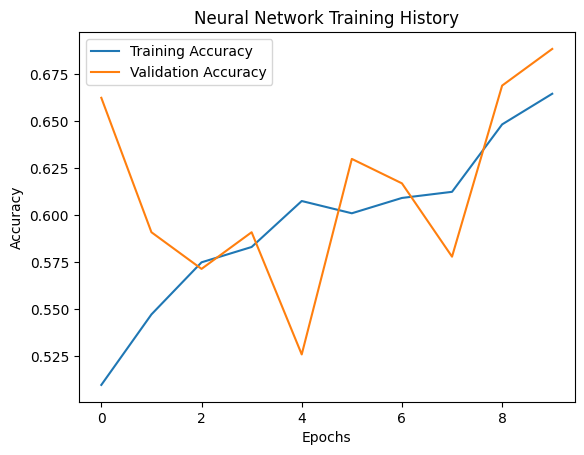

In [ ]:
plt.plot(history_nn.history['accuracy'], label='Training Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(random_state=30)
model_dt.fit(X_train, y_train)

accuracy_dt = model_dt.score(X_test, y_test)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.7012987012987013


In [ ]:
y_pred_nn = model_nn.predict(X_test).flatten()
y_pred_dt = model_dt.predict(X_test)

y_pred_ensemble = (y_pred_nn + y_pred_dt) / 2.0

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble.round())
print("Ensemble Accuracy:", accuracy_ensemble)

5/5 [==============================] - 0s 2ms/step


NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error

# Report errors
error_1 = mean_squared_error(y_test, y_pred_nn)
error_2 = mean_squared_error(y_test, y_pred_dt)
error_ensemble = mean_squared_error(y_test, y_pred_ensemble)

print("Neural Network Mean Squared Error:", error_nn)
print("Decision Tree Mean Squared Error:", error_dt)
print("Ensemble Mean Squared Error:", error_ensemble)


NameError: name 'error_nn' is not defined